### Creating dataset of 500 images each

# ```
import os
import shutil
src = "Resources\\ISL\\Digits"
dest = "Resources\\Train"
for d in os.listdir(src):
    os.mkdir(f"{dest}\{d}")
# ```

# ```
for d in os.listdir(src):
    files = os.listdir(f"{src}\\{d}")
    for file in files:
        shutil.copy(f"{src}\\{d}\\{file}",f"{dest}\\{d}")
# ```

In [1]:
from Libs.HandTracker import HandTracker
from Libs import utils
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def distanceMatrix(handData, palmdist):
#     """Eucledian distances between points 0,4,5,9,13,17,8,12,16 and 20"""
    distMatrix = np.zeros([len(handData), len(handData)], dtype="float32")
    pd = palmdist[0]
    for i in range(len(handData)):
        if i > 20:
            pd = palmdist[1]
        for j in range(len(handData)):
            distMatrix[i][j] = np.linalg.norm(np.array(handData[i]) - np.array(handData[j])) /pd
    return distMatrix

In [3]:
def getData(images):
    data = []
#     points = [0, 4, 5, 9, 13, 17, 8, 12, 16, 20]
    tracker = HandTracker(static= True)
    total = len(images)
    for idx,img in enumerate(images):
        print(f"{idx} / {total}")
        image = cv2.cvtColor(cv2.imread(img),cv2.COLOR_BGR2RGB)
        results = tracker.findHands(image)
        positions = []
        palmdist = []
        if results:
            for landmarks in results:
                tracker.drawHands(image, landmarks)
                position = tracker.getPos(landmarks.landmark, image.shape)
#                 pd = np.linalg.norm(np.array(position[0]) - np.array(position[3]))
                pd = np.linalg.norm(np.array(position[0]) - np.array(position[9]))
                palmdist.append(pd)
                positions.extend(position)
            data.append(distanceMatrix(positions, palmdist))
    return np.array(data)

In [4]:
images = np.array(utils.getFiles("Resources\\ISL\\Digits", (".jpg", ".png")))
labels = np.array([img.split("\\")[-2] for img in images]).astype("uint8")
len(images),len(labels)

(10792, 10792)

In [5]:
def shuffle(images,labels):
    assert len(images) == len(labels)
    p = np.random.permutation(len(images))
    return images[p],labels[p]

In [6]:
train_data,train_labels = shuffle(images,labels)

In [7]:
train_data[2500:2510]

array(['Resources\\ISL\\Digits\\4\\441.jpg',
       'Resources\\ISL\\Digits\\1\\759.jpg',
       'Resources\\ISL\\Digits\\1\\873.jpg',
       'Resources\\ISL\\Digits\\1\\1137.jpg',
       'Resources\\ISL\\Digits\\2\\228.jpg',
       'Resources\\ISL\\Digits\\2\\665.jpg',
       'Resources\\ISL\\Digits\\8\\410.jpg',
       'Resources\\ISL\\Digits\\8\\285.jpg',
       'Resources\\ISL\\Digits\\6\\717.jpg',
       'Resources\\ISL\\Digits\\7\\268.jpg'], dtype='<U31')

In [8]:
train_labels[2500:2510]

array([4, 1, 1, 1, 2, 2, 8, 8, 6, 7], dtype=uint8)

In [9]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(images,labels,test_size=0.2)

In [10]:
train_data.shape,test_data.shape

((8633,), (2159,))

In [11]:
X_train = getData(train_data)

0 / 8633
1 / 8633
2 / 8633
3 / 8633
4 / 8633
5 / 8633
6 / 8633
7 / 8633
8 / 8633
9 / 8633
10 / 8633
11 / 8633
12 / 8633
13 / 8633
14 / 8633
15 / 8633
16 / 8633
17 / 8633
18 / 8633
19 / 8633
20 / 8633
21 / 8633
22 / 8633
23 / 8633
24 / 8633
25 / 8633
26 / 8633
27 / 8633
28 / 8633
29 / 8633
30 / 8633
31 / 8633
32 / 8633
33 / 8633
34 / 8633
35 / 8633
36 / 8633
37 / 8633
38 / 8633
39 / 8633
40 / 8633
41 / 8633
42 / 8633
43 / 8633
44 / 8633
45 / 8633
46 / 8633
47 / 8633
48 / 8633
49 / 8633
50 / 8633
51 / 8633
52 / 8633
53 / 8633
54 / 8633
55 / 8633
56 / 8633
57 / 8633
58 / 8633
59 / 8633
60 / 8633
61 / 8633
62 / 8633
63 / 8633
64 / 8633
65 / 8633
66 / 8633
67 / 8633
68 / 8633
69 / 8633
70 / 8633
71 / 8633
72 / 8633
73 / 8633
74 / 8633
75 / 8633
76 / 8633
77 / 8633
78 / 8633
79 / 8633
80 / 8633
81 / 8633
82 / 8633
83 / 8633
84 / 8633
85 / 8633
86 / 8633
87 / 8633
88 / 8633
89 / 8633
90 / 8633
91 / 8633
92 / 8633
93 / 8633
94 / 8633
95 / 8633
96 / 8633
97 / 8633
98 / 8633
99 / 8633
100 / 8633

756 / 8633
757 / 8633
758 / 8633
759 / 8633
760 / 8633
761 / 8633
762 / 8633
763 / 8633
764 / 8633
765 / 8633
766 / 8633
767 / 8633
768 / 8633
769 / 8633
770 / 8633
771 / 8633
772 / 8633
773 / 8633
774 / 8633
775 / 8633
776 / 8633
777 / 8633
778 / 8633
779 / 8633
780 / 8633
781 / 8633
782 / 8633
783 / 8633
784 / 8633
785 / 8633
786 / 8633
787 / 8633
788 / 8633
789 / 8633
790 / 8633
791 / 8633
792 / 8633
793 / 8633
794 / 8633
795 / 8633
796 / 8633
797 / 8633
798 / 8633
799 / 8633
800 / 8633
801 / 8633
802 / 8633
803 / 8633
804 / 8633
805 / 8633
806 / 8633
807 / 8633
808 / 8633
809 / 8633
810 / 8633
811 / 8633
812 / 8633
813 / 8633
814 / 8633
815 / 8633
816 / 8633
817 / 8633
818 / 8633
819 / 8633
820 / 8633
821 / 8633
822 / 8633
823 / 8633
824 / 8633
825 / 8633
826 / 8633
827 / 8633
828 / 8633
829 / 8633
830 / 8633
831 / 8633
832 / 8633
833 / 8633
834 / 8633
835 / 8633
836 / 8633
837 / 8633
838 / 8633
839 / 8633
840 / 8633
841 / 8633
842 / 8633
843 / 8633
844 / 8633
845 / 8633
846 / 8633

1461 / 8633
1462 / 8633
1463 / 8633
1464 / 8633
1465 / 8633
1466 / 8633
1467 / 8633
1468 / 8633
1469 / 8633
1470 / 8633
1471 / 8633
1472 / 8633
1473 / 8633
1474 / 8633
1475 / 8633
1476 / 8633
1477 / 8633
1478 / 8633
1479 / 8633
1480 / 8633
1481 / 8633
1482 / 8633
1483 / 8633
1484 / 8633
1485 / 8633
1486 / 8633
1487 / 8633
1488 / 8633
1489 / 8633
1490 / 8633
1491 / 8633
1492 / 8633
1493 / 8633
1494 / 8633
1495 / 8633
1496 / 8633
1497 / 8633
1498 / 8633
1499 / 8633
1500 / 8633
1501 / 8633
1502 / 8633
1503 / 8633
1504 / 8633
1505 / 8633
1506 / 8633
1507 / 8633
1508 / 8633
1509 / 8633
1510 / 8633
1511 / 8633
1512 / 8633
1513 / 8633
1514 / 8633
1515 / 8633
1516 / 8633
1517 / 8633
1518 / 8633
1519 / 8633
1520 / 8633
1521 / 8633
1522 / 8633
1523 / 8633
1524 / 8633
1525 / 8633
1526 / 8633
1527 / 8633
1528 / 8633
1529 / 8633
1530 / 8633
1531 / 8633
1532 / 8633
1533 / 8633
1534 / 8633
1535 / 8633
1536 / 8633
1537 / 8633
1538 / 8633
1539 / 8633
1540 / 8633
1541 / 8633
1542 / 8633
1543 / 8633
1544

2147 / 8633
2148 / 8633
2149 / 8633
2150 / 8633
2151 / 8633
2152 / 8633
2153 / 8633
2154 / 8633
2155 / 8633
2156 / 8633
2157 / 8633
2158 / 8633
2159 / 8633
2160 / 8633
2161 / 8633
2162 / 8633
2163 / 8633
2164 / 8633
2165 / 8633
2166 / 8633
2167 / 8633
2168 / 8633
2169 / 8633
2170 / 8633
2171 / 8633
2172 / 8633
2173 / 8633
2174 / 8633
2175 / 8633
2176 / 8633
2177 / 8633
2178 / 8633
2179 / 8633
2180 / 8633
2181 / 8633
2182 / 8633
2183 / 8633
2184 / 8633
2185 / 8633
2186 / 8633
2187 / 8633
2188 / 8633
2189 / 8633
2190 / 8633
2191 / 8633
2192 / 8633
2193 / 8633
2194 / 8633
2195 / 8633
2196 / 8633
2197 / 8633
2198 / 8633
2199 / 8633
2200 / 8633
2201 / 8633
2202 / 8633
2203 / 8633
2204 / 8633
2205 / 8633
2206 / 8633
2207 / 8633
2208 / 8633
2209 / 8633
2210 / 8633
2211 / 8633
2212 / 8633
2213 / 8633
2214 / 8633
2215 / 8633
2216 / 8633
2217 / 8633
2218 / 8633
2219 / 8633
2220 / 8633
2221 / 8633
2222 / 8633
2223 / 8633
2224 / 8633
2225 / 8633
2226 / 8633
2227 / 8633
2228 / 8633
2229 / 8633
2230

2833 / 8633
2834 / 8633
2835 / 8633
2836 / 8633
2837 / 8633
2838 / 8633
2839 / 8633
2840 / 8633
2841 / 8633
2842 / 8633
2843 / 8633
2844 / 8633
2845 / 8633
2846 / 8633
2847 / 8633
2848 / 8633
2849 / 8633
2850 / 8633
2851 / 8633
2852 / 8633
2853 / 8633
2854 / 8633
2855 / 8633
2856 / 8633
2857 / 8633
2858 / 8633
2859 / 8633
2860 / 8633
2861 / 8633
2862 / 8633
2863 / 8633
2864 / 8633
2865 / 8633
2866 / 8633
2867 / 8633
2868 / 8633
2869 / 8633
2870 / 8633
2871 / 8633
2872 / 8633
2873 / 8633
2874 / 8633
2875 / 8633
2876 / 8633
2877 / 8633
2878 / 8633
2879 / 8633
2880 / 8633
2881 / 8633
2882 / 8633
2883 / 8633
2884 / 8633
2885 / 8633
2886 / 8633
2887 / 8633
2888 / 8633
2889 / 8633
2890 / 8633
2891 / 8633
2892 / 8633
2893 / 8633
2894 / 8633
2895 / 8633
2896 / 8633
2897 / 8633
2898 / 8633
2899 / 8633
2900 / 8633
2901 / 8633
2902 / 8633
2903 / 8633
2904 / 8633
2905 / 8633
2906 / 8633
2907 / 8633
2908 / 8633
2909 / 8633
2910 / 8633
2911 / 8633
2912 / 8633
2913 / 8633
2914 / 8633
2915 / 8633
2916

3519 / 8633
3520 / 8633
3521 / 8633
3522 / 8633
3523 / 8633
3524 / 8633
3525 / 8633
3526 / 8633
3527 / 8633
3528 / 8633
3529 / 8633
3530 / 8633
3531 / 8633
3532 / 8633
3533 / 8633
3534 / 8633
3535 / 8633
3536 / 8633
3537 / 8633
3538 / 8633
3539 / 8633
3540 / 8633
3541 / 8633
3542 / 8633
3543 / 8633
3544 / 8633
3545 / 8633
3546 / 8633
3547 / 8633
3548 / 8633
3549 / 8633
3550 / 8633
3551 / 8633
3552 / 8633
3553 / 8633
3554 / 8633
3555 / 8633
3556 / 8633
3557 / 8633
3558 / 8633
3559 / 8633
3560 / 8633
3561 / 8633
3562 / 8633
3563 / 8633
3564 / 8633
3565 / 8633
3566 / 8633
3567 / 8633
3568 / 8633
3569 / 8633
3570 / 8633
3571 / 8633
3572 / 8633
3573 / 8633
3574 / 8633
3575 / 8633
3576 / 8633
3577 / 8633
3578 / 8633
3579 / 8633
3580 / 8633
3581 / 8633
3582 / 8633
3583 / 8633
3584 / 8633
3585 / 8633
3586 / 8633
3587 / 8633
3588 / 8633
3589 / 8633
3590 / 8633
3591 / 8633
3592 / 8633
3593 / 8633
3594 / 8633
3595 / 8633
3596 / 8633
3597 / 8633
3598 / 8633
3599 / 8633
3600 / 8633
3601 / 8633
3602

4205 / 8633
4206 / 8633
4207 / 8633
4208 / 8633
4209 / 8633
4210 / 8633
4211 / 8633
4212 / 8633
4213 / 8633
4214 / 8633
4215 / 8633
4216 / 8633
4217 / 8633
4218 / 8633
4219 / 8633
4220 / 8633
4221 / 8633
4222 / 8633
4223 / 8633
4224 / 8633
4225 / 8633
4226 / 8633
4227 / 8633
4228 / 8633
4229 / 8633
4230 / 8633
4231 / 8633
4232 / 8633
4233 / 8633
4234 / 8633
4235 / 8633
4236 / 8633
4237 / 8633
4238 / 8633
4239 / 8633
4240 / 8633
4241 / 8633
4242 / 8633
4243 / 8633
4244 / 8633
4245 / 8633
4246 / 8633
4247 / 8633
4248 / 8633
4249 / 8633
4250 / 8633
4251 / 8633
4252 / 8633
4253 / 8633
4254 / 8633
4255 / 8633
4256 / 8633
4257 / 8633
4258 / 8633
4259 / 8633
4260 / 8633
4261 / 8633
4262 / 8633
4263 / 8633
4264 / 8633
4265 / 8633
4266 / 8633
4267 / 8633
4268 / 8633
4269 / 8633
4270 / 8633
4271 / 8633
4272 / 8633
4273 / 8633
4274 / 8633
4275 / 8633
4276 / 8633
4277 / 8633
4278 / 8633
4279 / 8633
4280 / 8633
4281 / 8633
4282 / 8633
4283 / 8633
4284 / 8633
4285 / 8633
4286 / 8633
4287 / 8633
4288

4892 / 8633
4893 / 8633
4894 / 8633
4895 / 8633
4896 / 8633
4897 / 8633
4898 / 8633
4899 / 8633
4900 / 8633
4901 / 8633
4902 / 8633
4903 / 8633
4904 / 8633
4905 / 8633
4906 / 8633
4907 / 8633
4908 / 8633
4909 / 8633
4910 / 8633
4911 / 8633
4912 / 8633
4913 / 8633
4914 / 8633
4915 / 8633
4916 / 8633
4917 / 8633
4918 / 8633
4919 / 8633
4920 / 8633
4921 / 8633
4922 / 8633
4923 / 8633
4924 / 8633
4925 / 8633
4926 / 8633
4927 / 8633
4928 / 8633
4929 / 8633
4930 / 8633
4931 / 8633
4932 / 8633
4933 / 8633
4934 / 8633
4935 / 8633
4936 / 8633
4937 / 8633
4938 / 8633
4939 / 8633
4940 / 8633
4941 / 8633
4942 / 8633
4943 / 8633
4944 / 8633
4945 / 8633
4946 / 8633
4947 / 8633
4948 / 8633
4949 / 8633
4950 / 8633
4951 / 8633
4952 / 8633
4953 / 8633
4954 / 8633
4955 / 8633
4956 / 8633
4957 / 8633
4958 / 8633
4959 / 8633
4960 / 8633
4961 / 8633
4962 / 8633
4963 / 8633
4964 / 8633
4965 / 8633
4966 / 8633
4967 / 8633
4968 / 8633
4969 / 8633
4970 / 8633
4971 / 8633
4972 / 8633
4973 / 8633
4974 / 8633
4975

5575 / 8633
5576 / 8633
5577 / 8633
5578 / 8633
5579 / 8633
5580 / 8633
5581 / 8633
5582 / 8633
5583 / 8633
5584 / 8633
5585 / 8633
5586 / 8633
5587 / 8633
5588 / 8633
5589 / 8633
5590 / 8633
5591 / 8633
5592 / 8633
5593 / 8633
5594 / 8633
5595 / 8633
5596 / 8633
5597 / 8633
5598 / 8633
5599 / 8633
5600 / 8633
5601 / 8633
5602 / 8633
5603 / 8633
5604 / 8633
5605 / 8633
5606 / 8633
5607 / 8633
5608 / 8633
5609 / 8633
5610 / 8633
5611 / 8633
5612 / 8633
5613 / 8633
5614 / 8633
5615 / 8633
5616 / 8633
5617 / 8633
5618 / 8633
5619 / 8633
5620 / 8633
5621 / 8633
5622 / 8633
5623 / 8633
5624 / 8633
5625 / 8633
5626 / 8633
5627 / 8633
5628 / 8633
5629 / 8633
5630 / 8633
5631 / 8633
5632 / 8633
5633 / 8633
5634 / 8633
5635 / 8633
5636 / 8633
5637 / 8633
5638 / 8633
5639 / 8633
5640 / 8633
5641 / 8633
5642 / 8633
5643 / 8633
5644 / 8633
5645 / 8633
5646 / 8633
5647 / 8633
5648 / 8633
5649 / 8633
5650 / 8633
5651 / 8633
5652 / 8633
5653 / 8633
5654 / 8633
5655 / 8633
5656 / 8633
5657 / 8633
5658

6261 / 8633
6262 / 8633
6263 / 8633
6264 / 8633
6265 / 8633
6266 / 8633
6267 / 8633
6268 / 8633
6269 / 8633
6270 / 8633
6271 / 8633
6272 / 8633
6273 / 8633
6274 / 8633
6275 / 8633
6276 / 8633
6277 / 8633
6278 / 8633
6279 / 8633
6280 / 8633
6281 / 8633
6282 / 8633
6283 / 8633
6284 / 8633
6285 / 8633
6286 / 8633
6287 / 8633
6288 / 8633
6289 / 8633
6290 / 8633
6291 / 8633
6292 / 8633
6293 / 8633
6294 / 8633
6295 / 8633
6296 / 8633
6297 / 8633
6298 / 8633
6299 / 8633
6300 / 8633
6301 / 8633
6302 / 8633
6303 / 8633
6304 / 8633
6305 / 8633
6306 / 8633
6307 / 8633
6308 / 8633
6309 / 8633
6310 / 8633
6311 / 8633
6312 / 8633
6313 / 8633
6314 / 8633
6315 / 8633
6316 / 8633
6317 / 8633
6318 / 8633
6319 / 8633
6320 / 8633
6321 / 8633
6322 / 8633
6323 / 8633
6324 / 8633
6325 / 8633
6326 / 8633
6327 / 8633
6328 / 8633
6329 / 8633
6330 / 8633
6331 / 8633
6332 / 8633
6333 / 8633
6334 / 8633
6335 / 8633
6336 / 8633
6337 / 8633
6338 / 8633
6339 / 8633
6340 / 8633
6341 / 8633
6342 / 8633
6343 / 8633
6344

6944 / 8633
6945 / 8633
6946 / 8633
6947 / 8633
6948 / 8633
6949 / 8633
6950 / 8633
6951 / 8633
6952 / 8633
6953 / 8633
6954 / 8633
6955 / 8633
6956 / 8633
6957 / 8633
6958 / 8633
6959 / 8633
6960 / 8633
6961 / 8633
6962 / 8633
6963 / 8633
6964 / 8633
6965 / 8633
6966 / 8633
6967 / 8633
6968 / 8633
6969 / 8633
6970 / 8633
6971 / 8633
6972 / 8633
6973 / 8633
6974 / 8633
6975 / 8633
6976 / 8633
6977 / 8633
6978 / 8633
6979 / 8633
6980 / 8633
6981 / 8633
6982 / 8633
6983 / 8633
6984 / 8633
6985 / 8633
6986 / 8633
6987 / 8633
6988 / 8633
6989 / 8633
6990 / 8633
6991 / 8633
6992 / 8633
6993 / 8633
6994 / 8633
6995 / 8633
6996 / 8633
6997 / 8633
6998 / 8633
6999 / 8633
7000 / 8633
7001 / 8633
7002 / 8633
7003 / 8633
7004 / 8633
7005 / 8633
7006 / 8633
7007 / 8633
7008 / 8633
7009 / 8633
7010 / 8633
7011 / 8633
7012 / 8633
7013 / 8633
7014 / 8633
7015 / 8633
7016 / 8633
7017 / 8633
7018 / 8633
7019 / 8633
7020 / 8633
7021 / 8633
7022 / 8633
7023 / 8633
7024 / 8633
7025 / 8633
7026 / 8633
7027

7630 / 8633
7631 / 8633
7632 / 8633
7633 / 8633
7634 / 8633
7635 / 8633
7636 / 8633
7637 / 8633
7638 / 8633
7639 / 8633
7640 / 8633
7641 / 8633
7642 / 8633
7643 / 8633
7644 / 8633
7645 / 8633
7646 / 8633
7647 / 8633
7648 / 8633
7649 / 8633
7650 / 8633
7651 / 8633
7652 / 8633
7653 / 8633
7654 / 8633
7655 / 8633
7656 / 8633
7657 / 8633
7658 / 8633
7659 / 8633
7660 / 8633
7661 / 8633
7662 / 8633
7663 / 8633
7664 / 8633
7665 / 8633
7666 / 8633
7667 / 8633
7668 / 8633
7669 / 8633
7670 / 8633
7671 / 8633
7672 / 8633
7673 / 8633
7674 / 8633
7675 / 8633
7676 / 8633
7677 / 8633
7678 / 8633
7679 / 8633
7680 / 8633
7681 / 8633
7682 / 8633
7683 / 8633
7684 / 8633
7685 / 8633
7686 / 8633
7687 / 8633
7688 / 8633
7689 / 8633
7690 / 8633
7691 / 8633
7692 / 8633
7693 / 8633
7694 / 8633
7695 / 8633
7696 / 8633
7697 / 8633
7698 / 8633
7699 / 8633
7700 / 8633
7701 / 8633
7702 / 8633
7703 / 8633
7704 / 8633
7705 / 8633
7706 / 8633
7707 / 8633
7708 / 8633
7709 / 8633
7710 / 8633
7711 / 8633
7712 / 8633
7713

8314 / 8633
8315 / 8633
8316 / 8633
8317 / 8633
8318 / 8633
8319 / 8633
8320 / 8633
8321 / 8633
8322 / 8633
8323 / 8633
8324 / 8633
8325 / 8633
8326 / 8633
8327 / 8633
8328 / 8633
8329 / 8633
8330 / 8633
8331 / 8633
8332 / 8633
8333 / 8633
8334 / 8633
8335 / 8633
8336 / 8633
8337 / 8633
8338 / 8633
8339 / 8633
8340 / 8633
8341 / 8633
8342 / 8633
8343 / 8633
8344 / 8633
8345 / 8633
8346 / 8633
8347 / 8633
8348 / 8633
8349 / 8633
8350 / 8633
8351 / 8633
8352 / 8633
8353 / 8633
8354 / 8633
8355 / 8633
8356 / 8633
8357 / 8633
8358 / 8633
8359 / 8633
8360 / 8633
8361 / 8633
8362 / 8633
8363 / 8633
8364 / 8633
8365 / 8633
8366 / 8633
8367 / 8633
8368 / 8633
8369 / 8633
8370 / 8633
8371 / 8633
8372 / 8633
8373 / 8633
8374 / 8633
8375 / 8633
8376 / 8633
8377 / 8633
8378 / 8633
8379 / 8633
8380 / 8633
8381 / 8633
8382 / 8633
8383 / 8633
8384 / 8633
8385 / 8633
8386 / 8633
8387 / 8633
8388 / 8633
8389 / 8633
8390 / 8633
8391 / 8633
8392 / 8633
8393 / 8633
8394 / 8633
8395 / 8633
8396 / 8633
8397

In [12]:
X_test = getData(test_data)

0 / 2159
1 / 2159
2 / 2159
3 / 2159
4 / 2159
5 / 2159
6 / 2159
7 / 2159
8 / 2159
9 / 2159
10 / 2159
11 / 2159
12 / 2159
13 / 2159
14 / 2159
15 / 2159
16 / 2159
17 / 2159
18 / 2159
19 / 2159
20 / 2159
21 / 2159
22 / 2159
23 / 2159
24 / 2159
25 / 2159
26 / 2159
27 / 2159
28 / 2159
29 / 2159
30 / 2159
31 / 2159
32 / 2159
33 / 2159
34 / 2159
35 / 2159
36 / 2159
37 / 2159
38 / 2159
39 / 2159
40 / 2159
41 / 2159
42 / 2159
43 / 2159
44 / 2159
45 / 2159
46 / 2159
47 / 2159
48 / 2159
49 / 2159
50 / 2159
51 / 2159
52 / 2159
53 / 2159
54 / 2159
55 / 2159
56 / 2159
57 / 2159
58 / 2159
59 / 2159
60 / 2159
61 / 2159
62 / 2159
63 / 2159
64 / 2159
65 / 2159
66 / 2159
67 / 2159
68 / 2159
69 / 2159
70 / 2159
71 / 2159
72 / 2159
73 / 2159
74 / 2159
75 / 2159
76 / 2159
77 / 2159
78 / 2159
79 / 2159
80 / 2159
81 / 2159
82 / 2159
83 / 2159
84 / 2159
85 / 2159
86 / 2159
87 / 2159
88 / 2159
89 / 2159
90 / 2159
91 / 2159
92 / 2159
93 / 2159
94 / 2159
95 / 2159
96 / 2159
97 / 2159
98 / 2159
99 / 2159
100 / 2159

759 / 2159
760 / 2159
761 / 2159
762 / 2159
763 / 2159
764 / 2159
765 / 2159
766 / 2159
767 / 2159
768 / 2159
769 / 2159
770 / 2159
771 / 2159
772 / 2159
773 / 2159
774 / 2159
775 / 2159
776 / 2159
777 / 2159
778 / 2159
779 / 2159
780 / 2159
781 / 2159
782 / 2159
783 / 2159
784 / 2159
785 / 2159
786 / 2159
787 / 2159
788 / 2159
789 / 2159
790 / 2159
791 / 2159
792 / 2159
793 / 2159
794 / 2159
795 / 2159
796 / 2159
797 / 2159
798 / 2159
799 / 2159
800 / 2159
801 / 2159
802 / 2159
803 / 2159
804 / 2159
805 / 2159
806 / 2159
807 / 2159
808 / 2159
809 / 2159
810 / 2159
811 / 2159
812 / 2159
813 / 2159
814 / 2159
815 / 2159
816 / 2159
817 / 2159
818 / 2159
819 / 2159
820 / 2159
821 / 2159
822 / 2159
823 / 2159
824 / 2159
825 / 2159
826 / 2159
827 / 2159
828 / 2159
829 / 2159
830 / 2159
831 / 2159
832 / 2159
833 / 2159
834 / 2159
835 / 2159
836 / 2159
837 / 2159
838 / 2159
839 / 2159
840 / 2159
841 / 2159
842 / 2159
843 / 2159
844 / 2159
845 / 2159
846 / 2159
847 / 2159
848 / 2159
849 / 2159

1466 / 2159
1467 / 2159
1468 / 2159
1469 / 2159
1470 / 2159
1471 / 2159
1472 / 2159
1473 / 2159
1474 / 2159
1475 / 2159
1476 / 2159
1477 / 2159
1478 / 2159
1479 / 2159
1480 / 2159
1481 / 2159
1482 / 2159
1483 / 2159
1484 / 2159
1485 / 2159
1486 / 2159
1487 / 2159
1488 / 2159
1489 / 2159
1490 / 2159
1491 / 2159
1492 / 2159
1493 / 2159
1494 / 2159
1495 / 2159
1496 / 2159
1497 / 2159
1498 / 2159
1499 / 2159
1500 / 2159
1501 / 2159
1502 / 2159
1503 / 2159
1504 / 2159
1505 / 2159
1506 / 2159
1507 / 2159
1508 / 2159
1509 / 2159
1510 / 2159
1511 / 2159
1512 / 2159
1513 / 2159
1514 / 2159
1515 / 2159
1516 / 2159
1517 / 2159
1518 / 2159
1519 / 2159
1520 / 2159
1521 / 2159
1522 / 2159
1523 / 2159
1524 / 2159
1525 / 2159
1526 / 2159
1527 / 2159
1528 / 2159
1529 / 2159
1530 / 2159
1531 / 2159
1532 / 2159
1533 / 2159
1534 / 2159
1535 / 2159
1536 / 2159
1537 / 2159
1538 / 2159
1539 / 2159
1540 / 2159
1541 / 2159
1542 / 2159
1543 / 2159
1544 / 2159
1545 / 2159
1546 / 2159
1547 / 2159
1548 / 2159
1549

2150 / 2159
2151 / 2159
2152 / 2159
2153 / 2159
2154 / 2159
2155 / 2159
2156 / 2159
2157 / 2159
2158 / 2159


In [13]:
X_train.shape,X_test.shape

((8633, 21, 21), (2159, 21, 21))

In [14]:
y_train = train_labels
y_test = test_data

In [15]:
y_train.shape,y_test.shape

((8633,), (2159,))

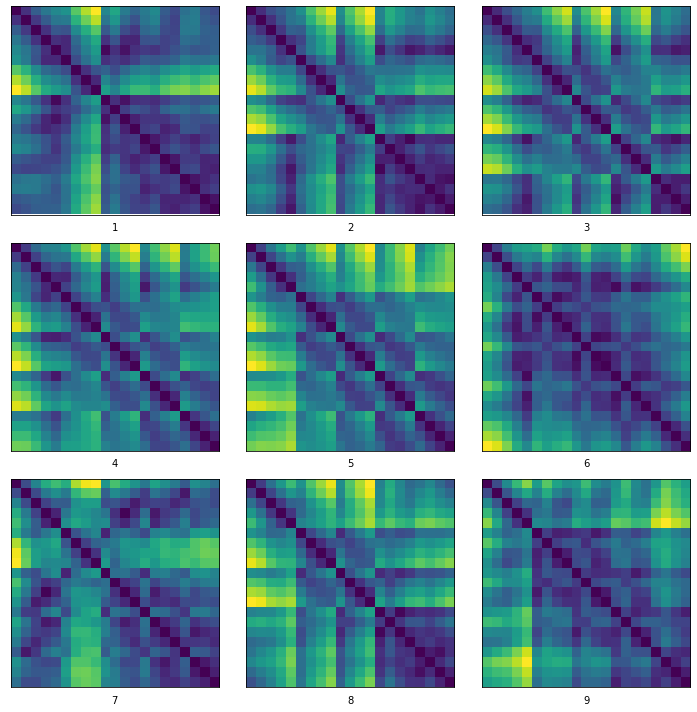

In [16]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xlabel(i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[np.where(y_train == (i+1))[0][0]])
plt.tight_layout()

In [17]:
np.savez_compressed("digits.npz",train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test)